In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
%matplotlib inline

In [51]:
# load the data set

data = pd.read_csv("../Data/winequality-white.csv", sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [52]:
# check shape (row, column) of data sets

data.shape

(4898, 12)

In [53]:
# Check if my data set have sum null value or not

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [55]:
# get some stats

data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [57]:
# Checking the Categories for all features:

for col in data.columns:
    print("colun Name: ",col, "\n")
    print(pd.Categorical(data[col]),"\n\n")

colun Name:  fixed acidity 

[7.0, 6.3, 8.1, 7.2, 7.2, ..., 6.2, 6.6, 6.5, 5.5, 6.0]
Length: 4898
Categories (68, float64): [3.8, 3.9, 4.2, 4.4, ..., 10.3, 10.7, 11.8, 14.2] 


colun Name:  volatile acidity 

[0.27, 0.30, 0.28, 0.23, 0.23, ..., 0.21, 0.32, 0.24, 0.29, 0.21]
Length: 4898
Categories (125, float64): [0.080, 0.085, 0.090, 0.100, ..., 0.930, 0.965, 1.005, 1.100] 


colun Name:  citric acid 

[0.36, 0.34, 0.40, 0.32, 0.32, ..., 0.29, 0.36, 0.19, 0.30, 0.38]
Length: 4898
Categories (87, float64): [0.00, 0.01, 0.02, 0.03, ..., 0.99, 1.00, 1.23, 1.66] 


colun Name:  residual sugar 

[20.7, 1.6, 6.9, 8.5, 8.5, ..., 1.6, 8.0, 1.2, 1.1, 0.8]
Length: 4898
Categories (310, float64): [0.6, 0.7, 0.8, 0.9, ..., 23.50, 26.05, 31.60, 65.80] 


colun Name:  chlorides 

[0.045, 0.049, 0.050, 0.058, 0.058, ..., 0.039, 0.047, 0.041, 0.022, 0.020]
Length: 4898
Categories (160, float64): [0.009, 0.012, 0.013, 0.014, ..., 0.271, 0.290, 0.301, 0.346] 


colun Name:  free sulfur dioxide 

[45.0,

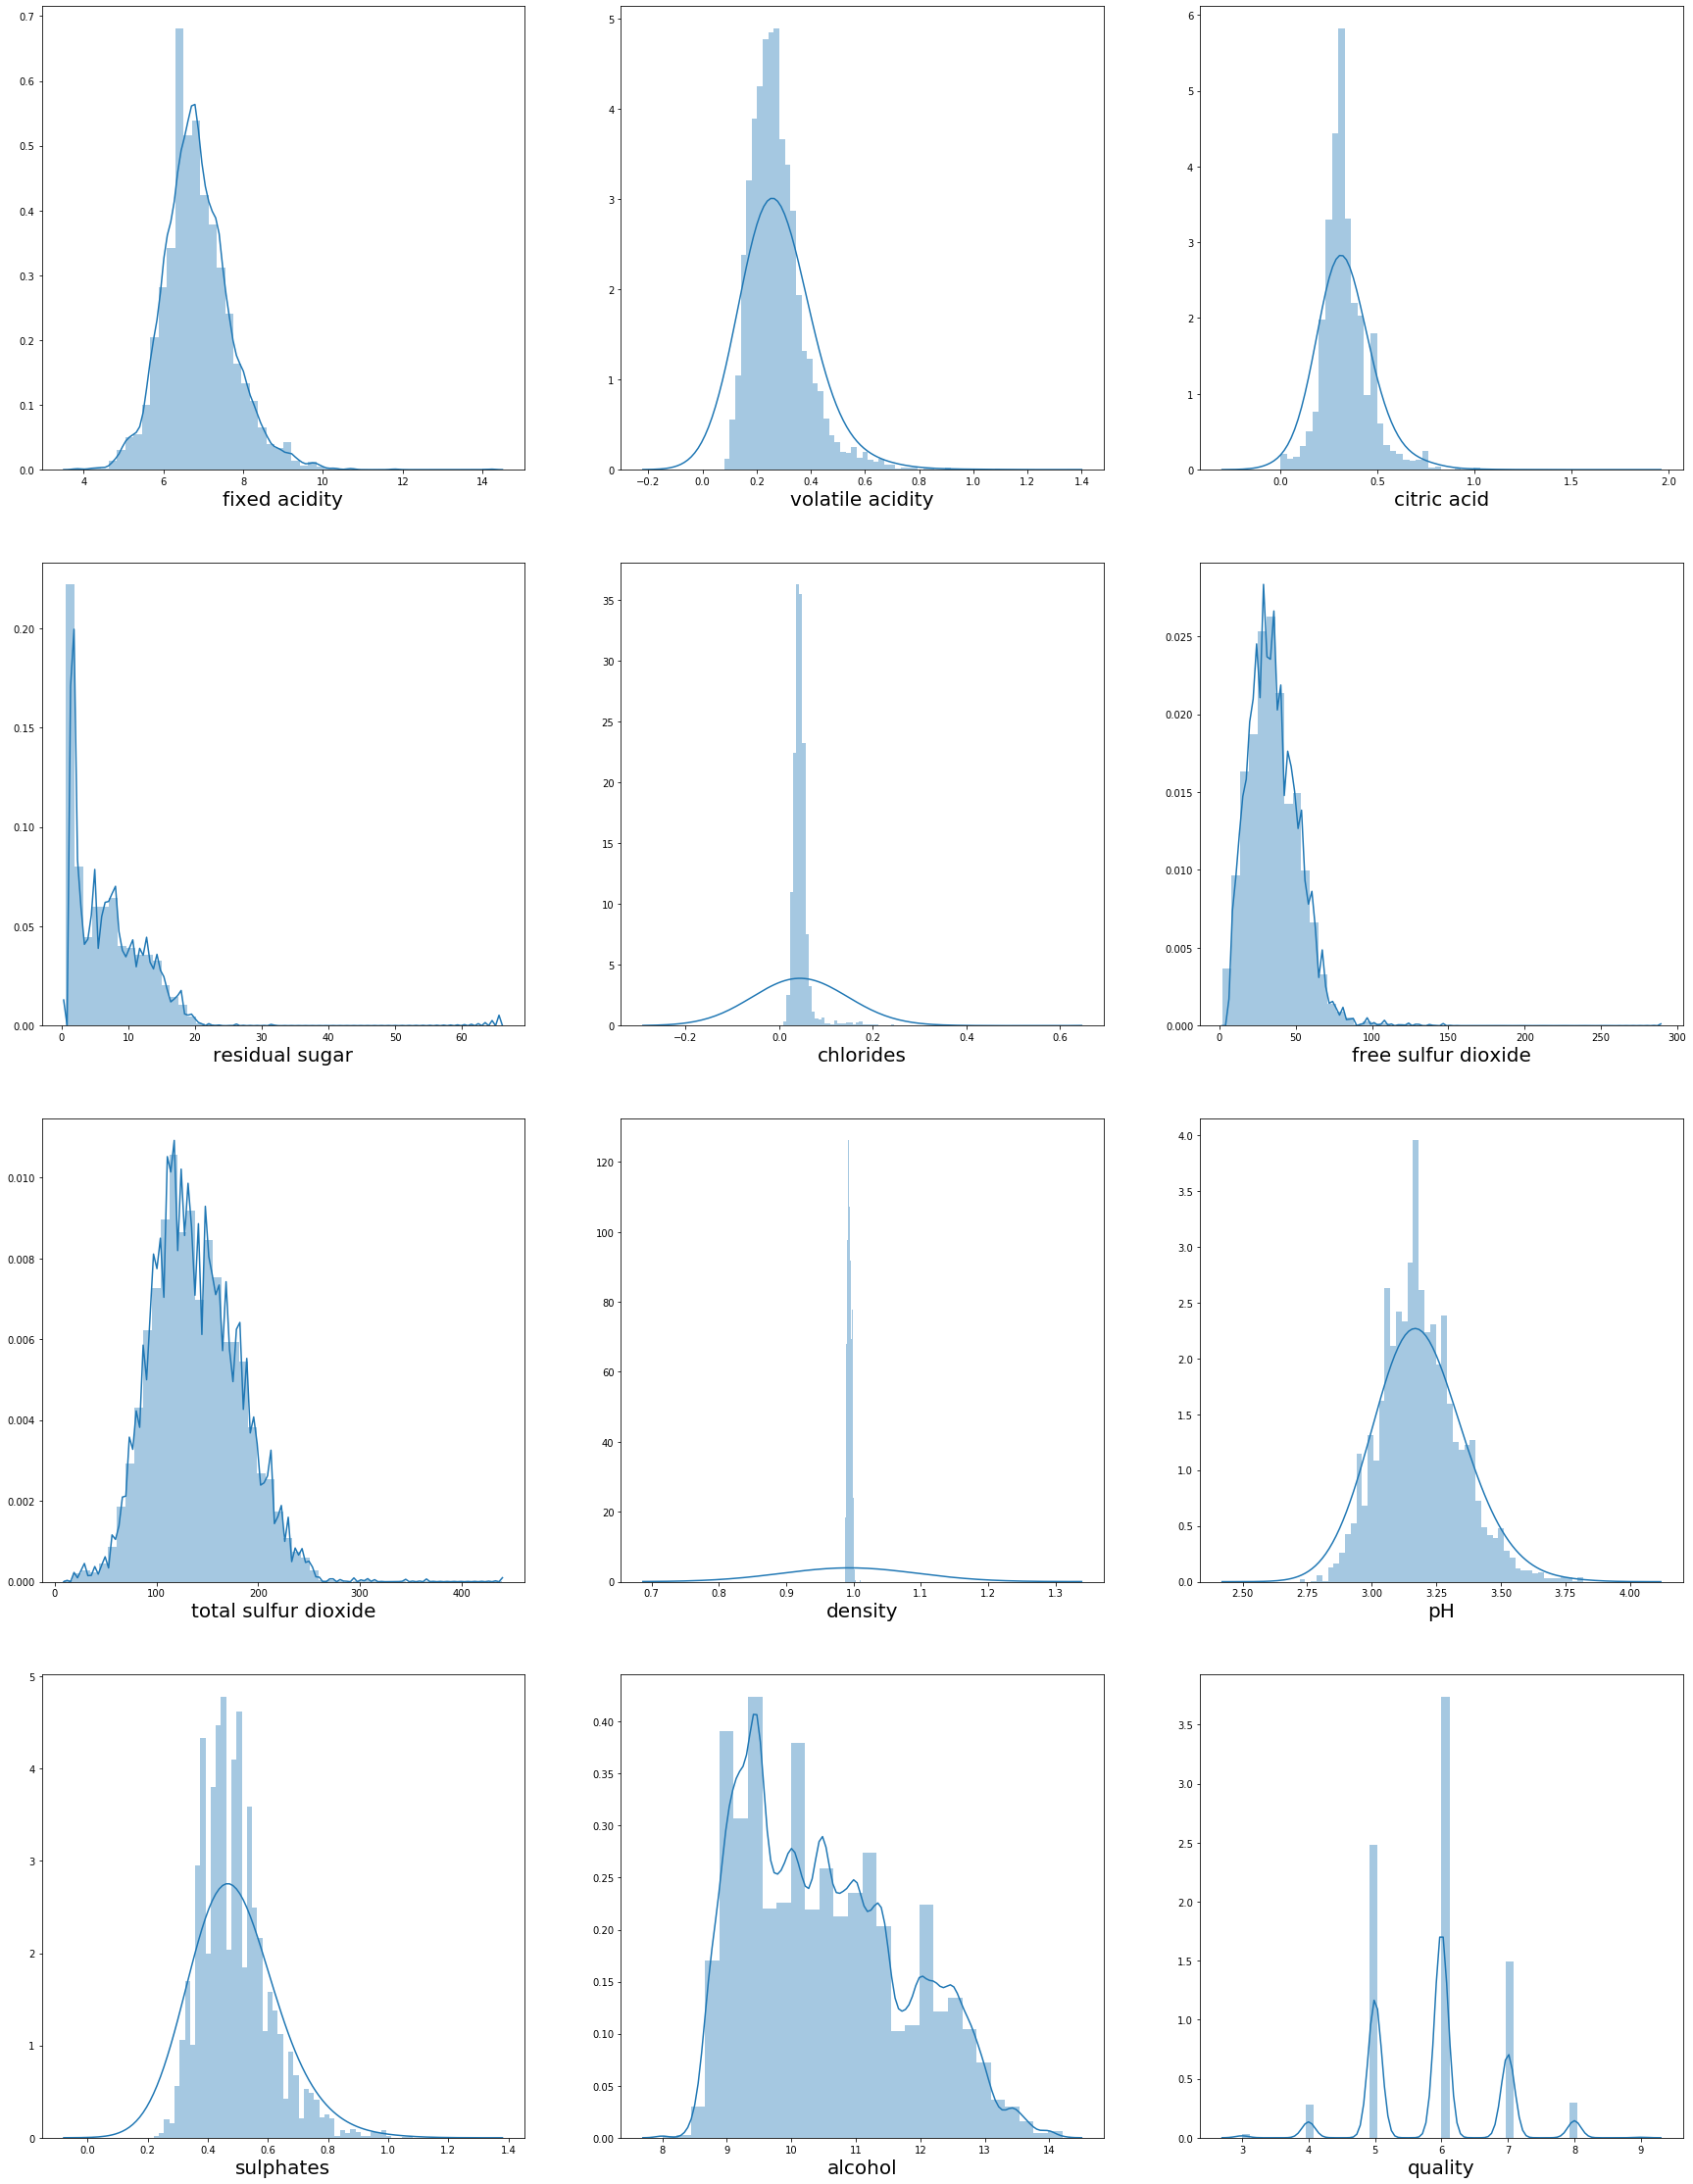

In [58]:
# checks all freatures are in standard normal form or not

plt.figure(figsize=(30,40), facecolor='white')

plotnumber = 1

for column in data:
    if plotnumber<=12 :
        ax = plt.subplot(4, 3, plotnumber)
        ax = sns.distplot(data[column], kde_kws={'bw':0.1})
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [69]:
Y = data['quality']
X = data.drop('quality', axis=1)

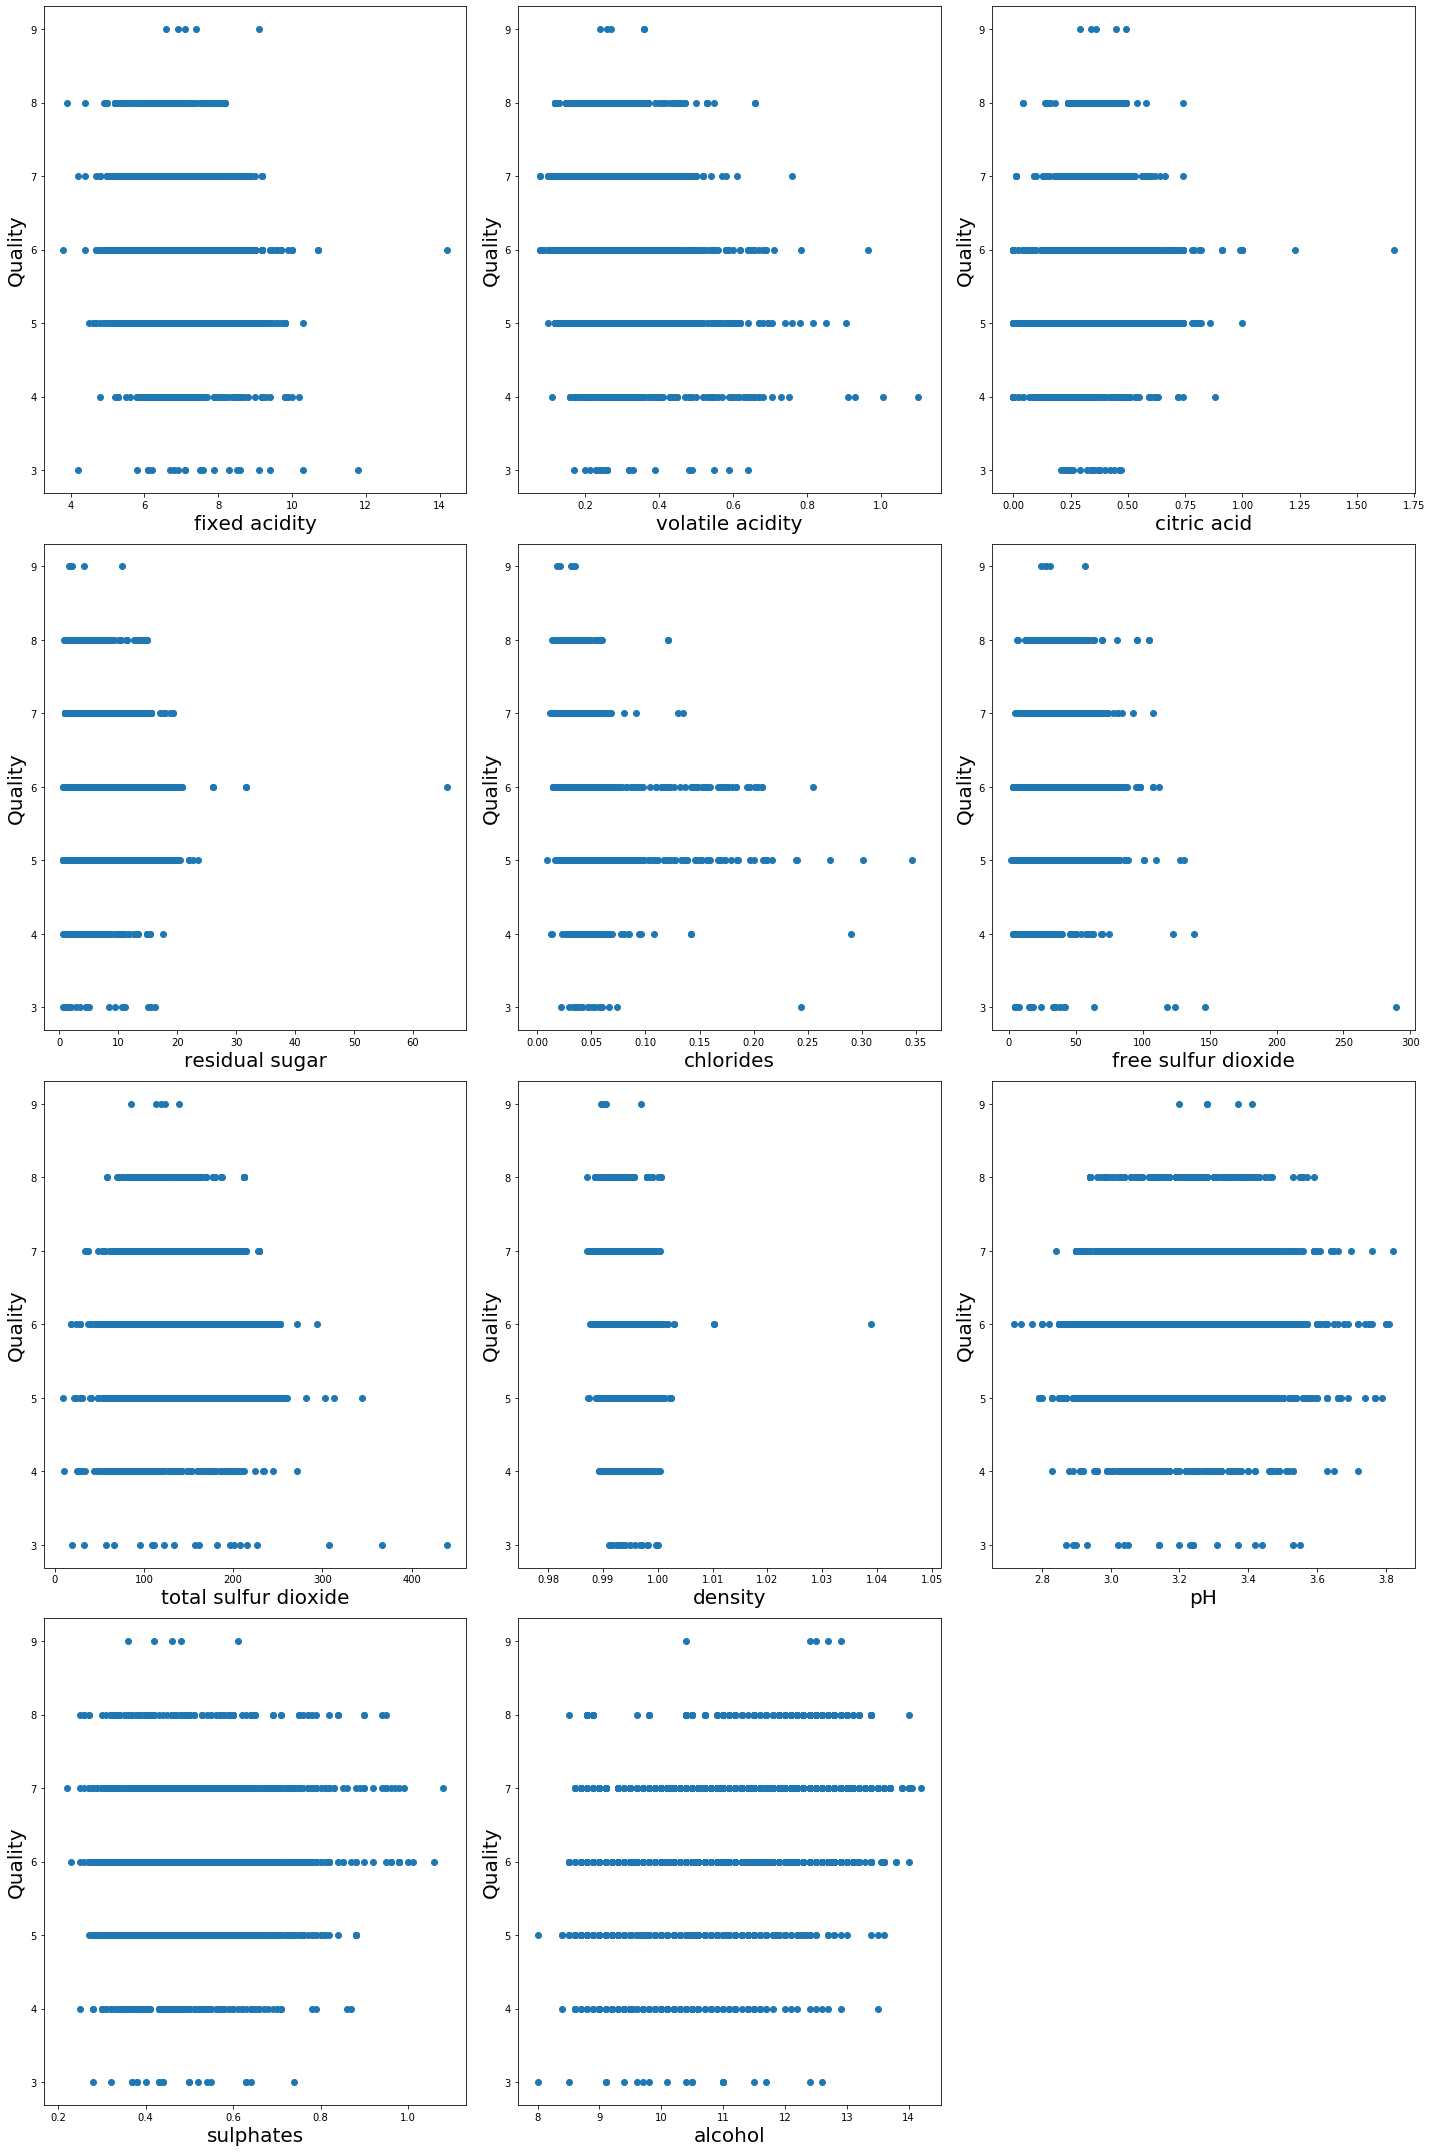

In [60]:
# Try to find the relation between X and Y

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=12 :
        ax = plt.subplot(4,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Quality',fontsize=20)
    plotnumber+=1
plt.tight_layout()

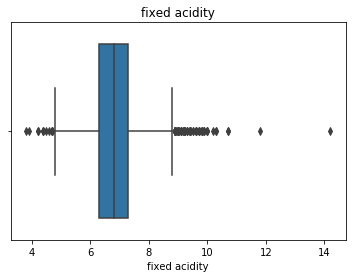

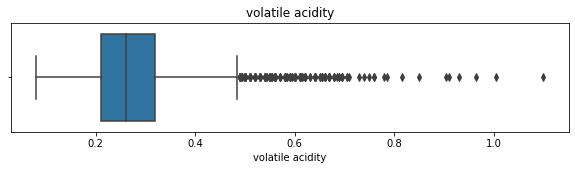

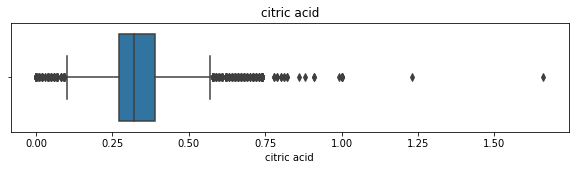

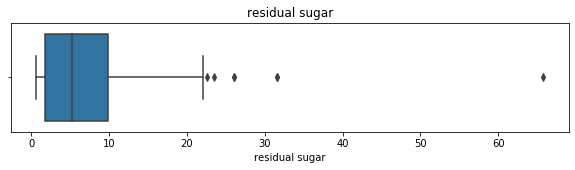

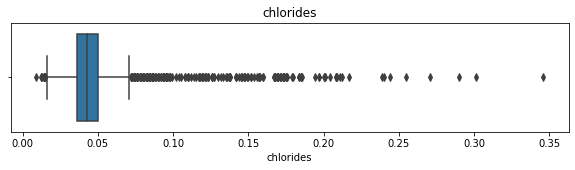

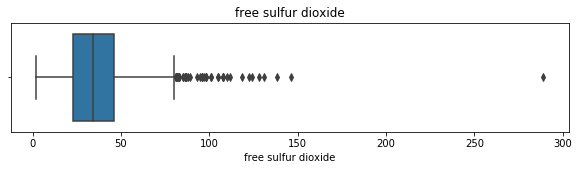

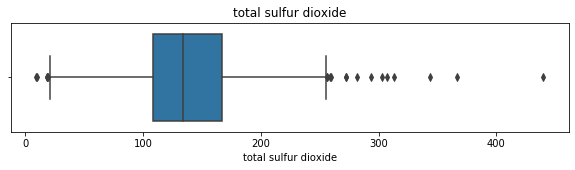

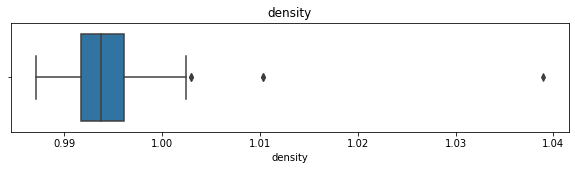

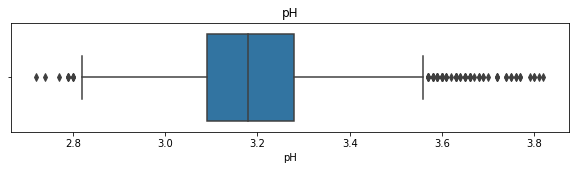

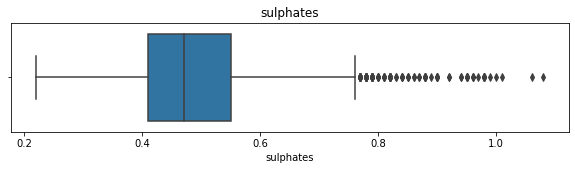

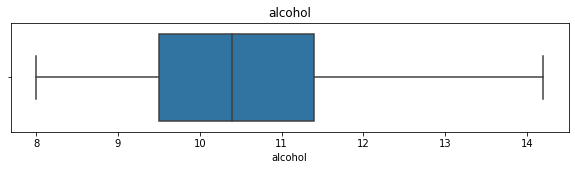

<Figure size 720x144 with 0 Axes>

In [90]:
# decting outliers

for column in X:
    df = X.copy()
    sns.boxplot(df[column])
    plt.title(column)
    plt.figure(figsize=(10,2))

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

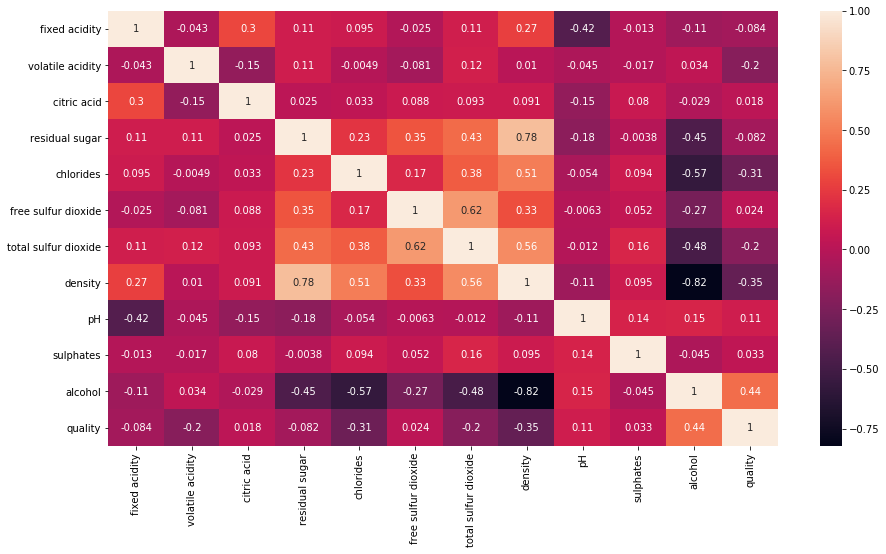

In [91]:
# Check the multicollinearity factor

corr = data.corr(method='spearman')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

In [ ]:
# Now Handle with outliers, convert the data in standard normal form, and multicollinearity factor

In [80]:
# standarised the data

X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

In [93]:
# get the standarised data frame

col = X.columns
df = pd.DataFrame(X_scaled, columns=col)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572


In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,7.584333e-17,1.000102,-3.620351,-0.657501,-0.064931,0.527639,8.705106
volatile acidity,4898.0,5.196832e-16,1.000102,-1.966985,-0.677101,-0.180992,0.414339,8.153643
citric acid,4898.0,6.019639e-16,1.000102,-2.761743,-0.530476,-0.117278,0.461199,10.956420
residual sugar,4898.0,-1.024542e-16,1.000102,-1.141944,-0.925047,-0.234922,0.691818,11.714112
chlorides,4898.0,6.482723e-17,1.000102,-1.683274,-0.447335,-0.126906,0.193523,13.743076
free sulfur dioxide,4898.0,-4.671641e-17,1.000102,-1.958677,-0.723775,-0.076922,0.628736,14.918314
total sulfur dioxide,4898.0,1.057636e-16,1.000102,-3.044230,-0.714474,-0.102619,0.673966,7.098444
density,4898.0,3.212112e-14,1.000102,-2.313038,-0.770707,-0.096093,0.693046,15.031298
pH,4898.0,-1.203860e-15,1.000102,-3.101408,-0.650836,-0.054751,0.607565,4.184075
sulphates,4898.0,-7.572999e-16,1.000102,-2.364709,-0.699710,-0.173921,0.527131,5.171602


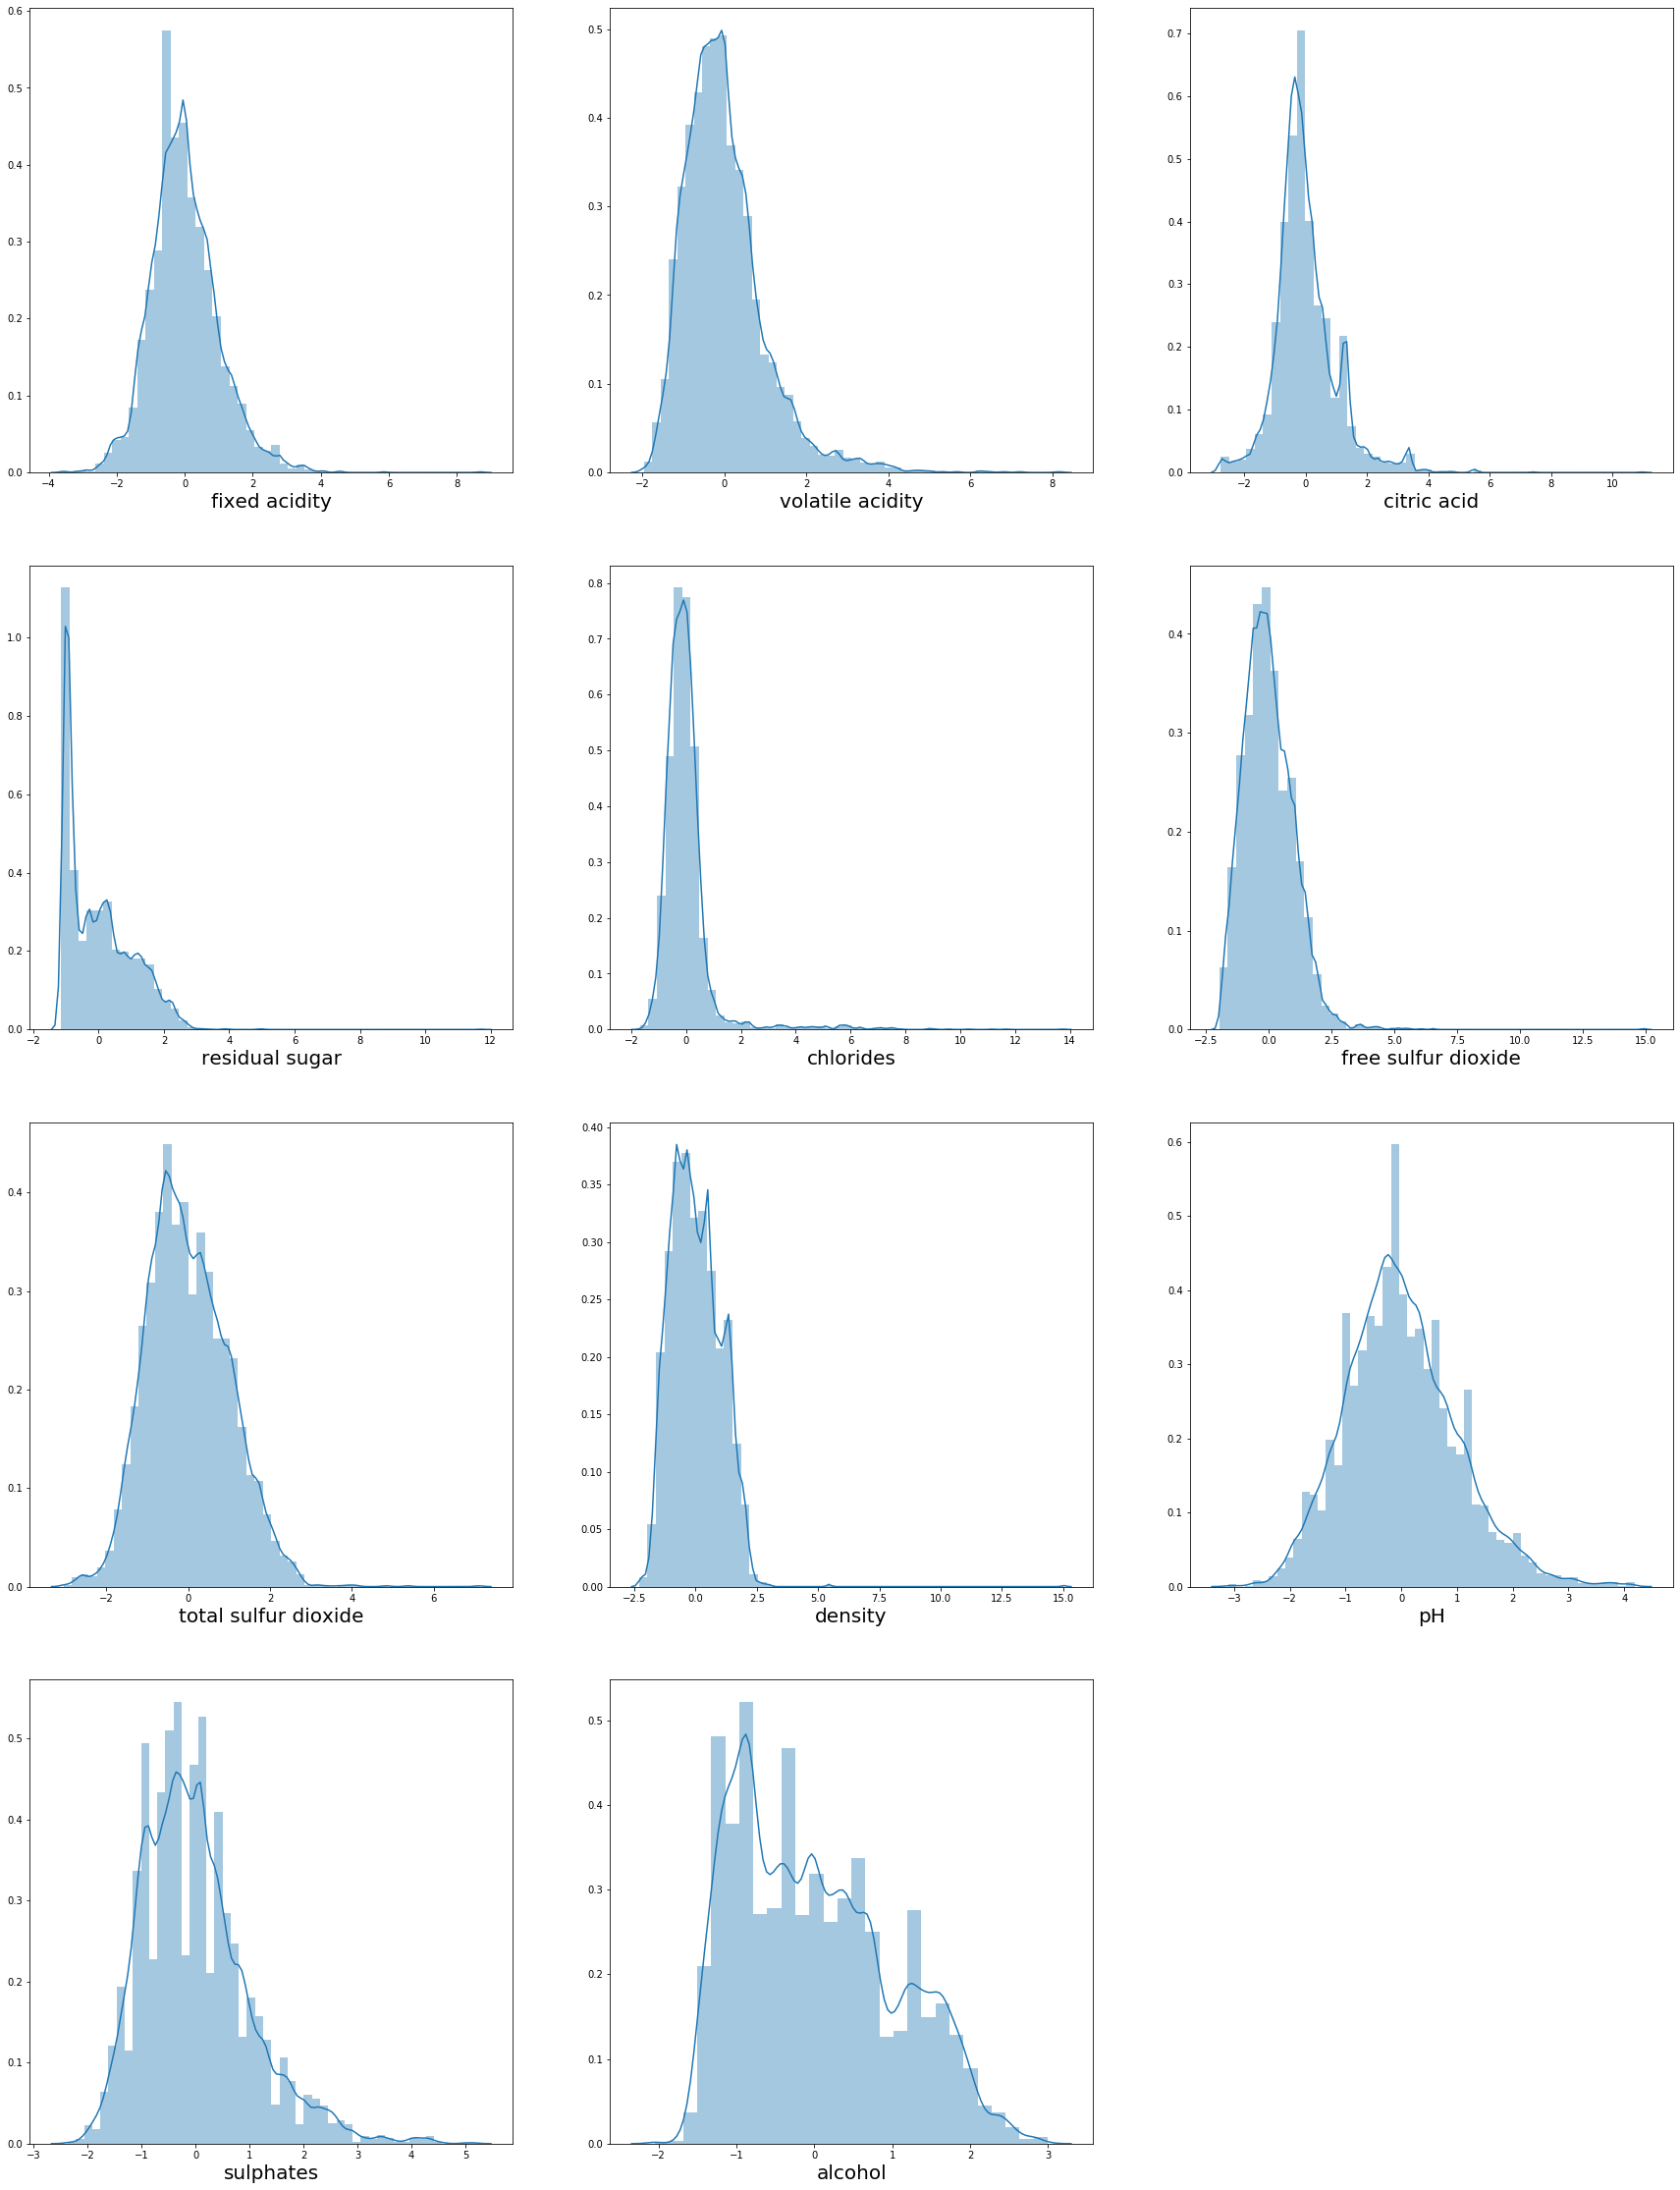

In [89]:
# all freatures are in standard normal form

plt.figure(figsize=(30,40), facecolor='white')

plotnumber = 1

for column in df:
    if plotnumber<=12 :
        ax = plt.subplot(4, 3, plotnumber)
        ax = sns.distplot(df[column], kde_kws={'bw':0.1})
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

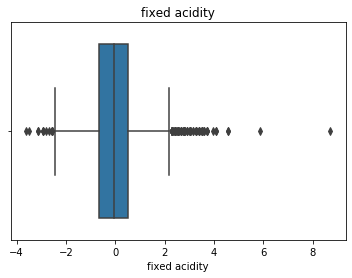

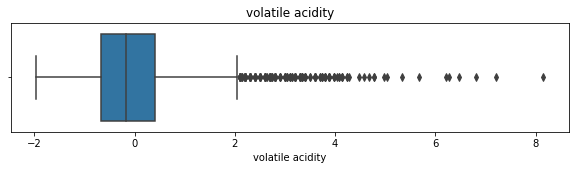

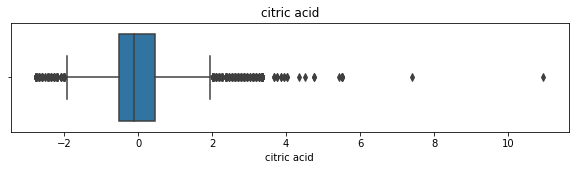

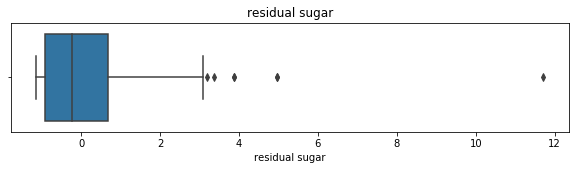

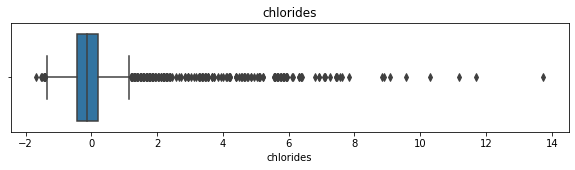

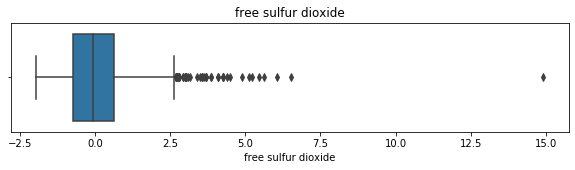

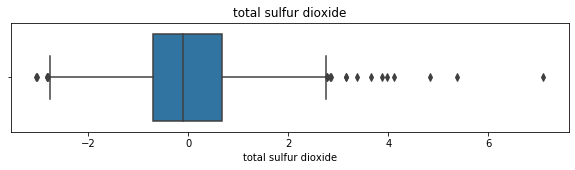

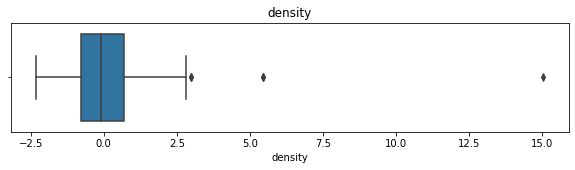

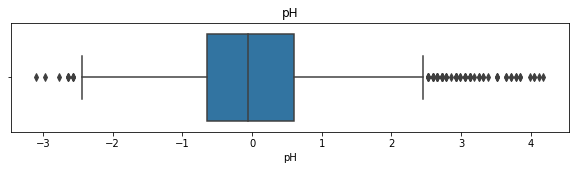

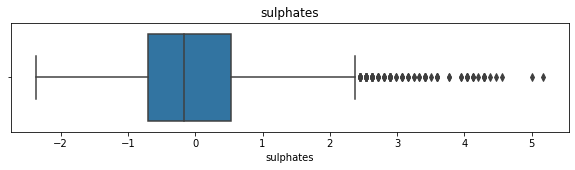

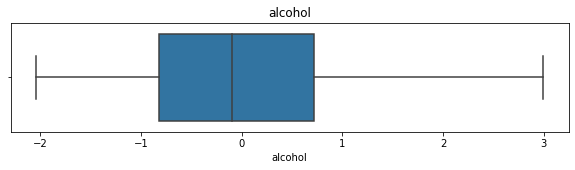

<Figure size 720x144 with 0 Axes>

In [96]:
# further check the outliers

for column in df:
    ddf = df.copy()
    sns.boxplot(ddf[column])
    plt.title(column)
    plt.figure(figsize=(10,2))

In [ ]:
# try to remove those outliers

In [97]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [99]:
df.shape

(4898, 11)

In [113]:
# fixed acidity ( +ve and -ve outliers)

IQR = df['fixed acidity'].quantile(0.75) - df['fixed acidity'].quantile(0.25)
lower = df['fixed acidity'].quantile(0.25) - (IQR * 1.5)
upper = df['fixed acidity'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


# (+ve and -ve) outliers
df.loc[df['fixed acidity']>=upper, 'fixed acidity']=upper
df.loc[df['fixed acidity']<=lower, 'fixed acidity']=lower

IQR: 1.1851401265066905,  lower: -2.4352113173147436,  upper: 2.3053491887120185


In [115]:
# volatile acidity ( +ve outliers)

IQR = df['volatile acidity'].quantile(0.75) - df['volatile acidity'].quantile(0.25)
lower = df['volatile acidity'].quantile(0.25) - (IQR * 1.5)
upper = df['volatile acidity'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")

# (+ve) outliers
df.loc[df['volatile acidity']>=upper, 'volatile acidity']=upper

IQR: 1.0914402863248716,  lower: -2.3142613955637326,  upper: 2.051499749735753


In [116]:
# citric acid ( +ve and -ve outliers)

IQR = df['citric acid'].quantile(0.75) - df['citric acid'].quantile(0.25)
lower = df['citric acid'].quantile(0.25) - (IQR * 1.5)
upper = df['citric acid'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


# (+ve and -ve) outliers
df.loc[df['citric acid']>=upper, 'citric acid']=upper
df.loc[df['citric acid']<=lower, 'citric acid']=lower

IQR: 0.9916744830680286,  lower: -2.017987385112147,  upper: 1.9487105471599673


In [117]:
# residual sugar ( +ve outliers)

IQR = df['residual sugar'].quantile(0.75) - df['residual sugar'].quantile(0.25)
lower = df['residual sugar'].quantile(0.25) - (IQR * 1.5)
upper = df['residual sugar'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")

# (+ve) outliers
df.loc[df['residual sugar']>=upper, 'residual sugar']=upper

IQR: 1.6168658863472634,  lower: -3.3503462259874697,  upper: 3.117117319401584


In [118]:
# chlorides ( +ve and -ve outliers)

IQR = df['chlorides'].quantile(0.75) - df['chlorides'].quantile(0.25)
lower = df['chlorides'].quantile(0.25) - (IQR * 1.5)
upper = df['chlorides'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


# (+ve and -ve) outliers
df.loc[df['chlorides']>=upper, 'chlorides']=upper
df.loc[df['chlorides']<=lower, 'chlorides']=lower

IQR: 0.6408572785151002,  lower: -1.4086205971771486,  upper: 1.154808516883252


In [119]:
# free sulfur dioxide ( +ve outliers)

IQR = df['free sulfur dioxide'].quantile(0.75) - df['free sulfur dioxide'].quantile(0.25)
lower = df['free sulfur dioxide'].quantile(0.25) - (IQR * 1.5)
upper = df['free sulfur dioxide'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")

# (+ve) outliers
df.loc[df['free sulfur dioxide']>=upper, 'free sulfur dioxide']=upper

IQR: 1.3525114672034437,  lower: -2.752542244748209,  upper: 2.657503624065566


In [120]:
# total sulfur dioxide ( +ve and -ve outliers)

IQR = df['total sulfur dioxide'].quantile(0.75) - df['total sulfur dioxide'].quantile(0.25)
lower = df['total sulfur dioxide'].quantile(0.25) - (IQR * 1.5)
upper = df['total sulfur dioxide'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


# (+ve and -ve) outliers
df.loc[df['total sulfur dioxide']>=upper, 'total sulfur dioxide']=upper
df.loc[df['total sulfur dioxide']<=lower, 'total sulfur dioxide']=lower

IQR: 1.388440259760597,  lower: -2.7971342720560255,  upper: 2.7566267669863618


In [121]:
# density ( +ve outliers)

IQR = df['density'].quantile(0.75) - df['density'].quantile(0.25)
lower = df['density'].quantile(0.25) - (IQR * 1.5)
upper = df['density'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")

# (+ve) outliers
df.loc[df['density']>=upper, 'density']=upper 

IQR: 1.4637523186407846,  lower: -2.9663351123569206,  upper: 2.888674162206218


In [122]:
# pH ( +ve and -ve outliers)

IQR = df['pH'].quantile(0.75) - df['pH'].quantile(0.25)
lower = df['pH'].quantile(0.25) - (IQR * 1.5)
upper = df['pH'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


# (+ve and -ve) outliers
df.loc[df['pH']>=upper, 'pH']=upper
df.loc[df['pH']<=lower, 'pH']=lower

IQR: 1.2584016164607699,  lower: -2.5384387295403257,  upper: 2.4951677363027542


In [124]:
# sulphates ( +ve outliers)

IQR = df['sulphates'].quantile(0.75) - df['sulphates'].quantile(0.25)
lower = df['sulphates'].quantile(0.25) - (IQR * 1.5)
upper = df['sulphates'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")

# (+ve) outliers
df.loc[df['sulphates']>=upper, 'sulphates']=upper 

IQR: 1.22684136353468,  lower: -2.539972406476812,  upper: 2.367393047661908


In [111]:
df.shape

(4898, 11)

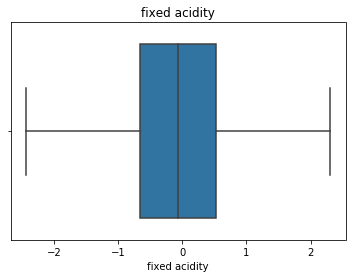

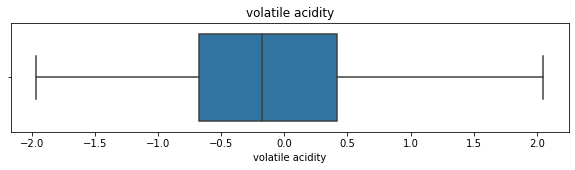

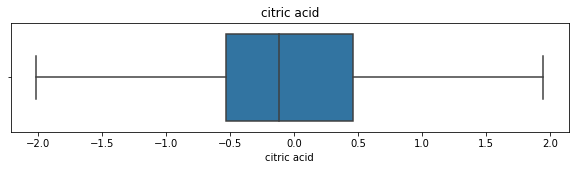

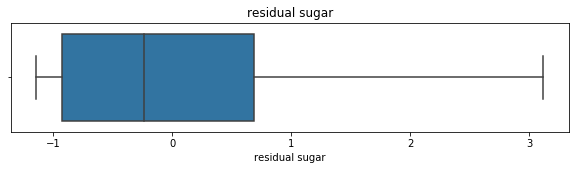

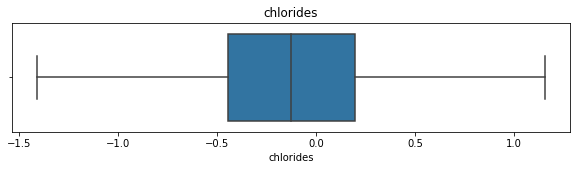

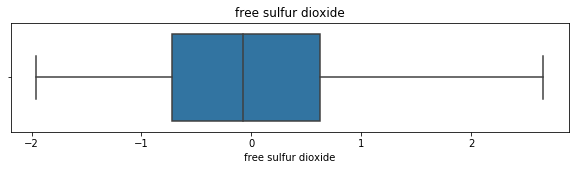

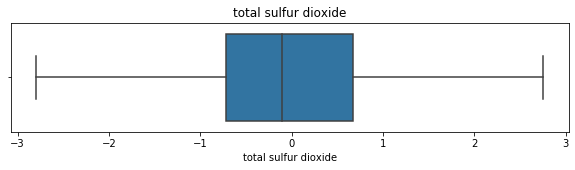

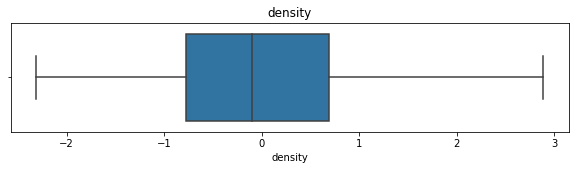

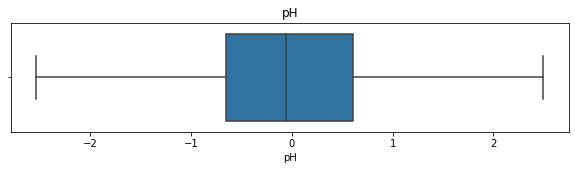

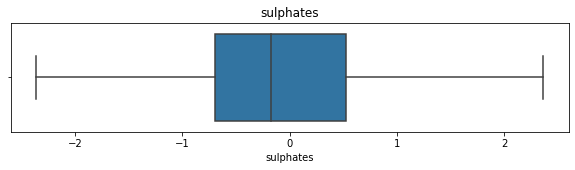

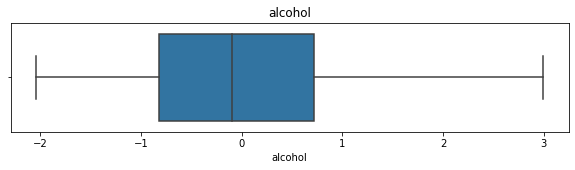

<Figure size 720x144 with 0 Axes>

In [125]:
# after delete all the outliers, check if my data sets have some outliers or not

for column in df:
    ddf = df.copy()
    sns.boxplot(ddf[column])
    plt.title(column)
    plt.figure(figsize=(10,2))

In [129]:
# variance_inflation_factor

variables = X_scaled
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [130]:
vif

,VIF,Features
0,3.163723,fixed acidity
1,1.139030,volatile acidity
2,1.167985,citric acid
3,15.697570,residual sugar
4,1.490835,chlorides
5,1.827987,free sulfur dioxide
6,2.348342,total sulfur dioxide
7,39.227736,density
8,2.406969,pH
9,1.172156,sulphates


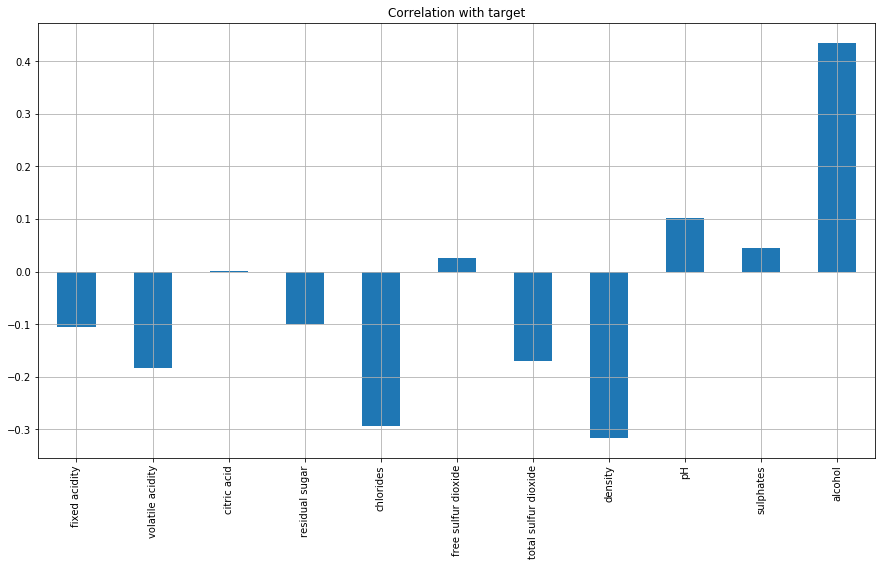

In [134]:
# Now Find the Correlation with target (quality) features

df.corrwith(Y).plot(kind='bar', grid=True, figsize=(15, 8), 
                                                   title="Correlation with target")

# Observation:

        * 1.  Using variance_inflation_factor (vif) I found that some features have huge 
              multicollinearity facetor. But I think this features are important to predict
              the outcome. So, I can not remove those features

        * 2.  citric acid and free sulfur dioxide are the least correlated with the target 
              variable
    
        * 3.  All other variables have a significant correlation with the target variable.
        




In [139]:
# Finally my data set is prepared.

df['quality'] = Y
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,6
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,6
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,6
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6


In [140]:
# now save the prepared white wine data to Prepared_Data Folder

df.to_csv("../Prepared_Data/prepared_white_wine.csv")

In [141]:
# We have student support group one to one discussion.. if you have any doubt need guidance in course feel free to contact on harshitpatidar777@gmail.com